# MDI220 : Mini-projet

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import probplot
from scipy.stats import gamma
from scipy.stats import norm
import statistics
import math

## Exercice 1

In [3]:
url='NuclearPowerAccidents2016.csv'
# na_values = ['NaN', '0']

df = pd.read_csv(url, sep=',', na_values = ['NaN'])
df['Date']=pd.to_datetime(df['Date'])


### 1. Extraction des prix

In [7]:
mile_island_date=df[df['Description'].str.contains('Island')]['Date'].to_string(index=False) # Date du Three Mile Island
events=df[df['Date'] < mile_island_date]
prices=events['Cost (millions 2013US$)'].dropna().to_numpy()

### 2. Construction du QQ-plot pour une loi normale
#### (a)

Soit $p \in ]0,1[$. On note $F_{\mu, \sigma^2}$ la fonction de répartition d'une loi normale de moyenne $\mu$ et de variance $\sigma^2$
D'une part, par défition du quantile on a :<br>
                $$F_{\mu,\sigma^2} (F^{-1}(p;\mu,\sigma^2))=p$$

D'autre part, 

\begin{align*}
F_{\mu,\sigma^2}(\mu+\sqrt{\sigma^2}F^{-1}(p;0,1))   & =  \frac{1}{\sigma\sqrt{2\pi}}\int_{-\infty}^{\mu+\sqrt{\sigma^2}F^{-1}(p;0,1)}e^{-\frac{1}{2}(\frac{t-\mu}{\sigma})^2} dt \\
                                                    & = \frac{1}{\sigma\sqrt{2\pi}}\int_{-\infty}^{F^{-1}(p;0,1)}e^{\frac{u^2}{2}}\sigma \, du \hspace{35pt} (Changement\space de\space variable : u=\frac{t-\mu}{\sigma}) \\
                                                    & = \frac{1}{\sqrt{2\pi}}\int_{-\infty}^{F^{-1}(p;0,1)}e^{\frac{u^2}{2}} \, du \\
                                                    & = F_{0,1}(F^{-1}(p;0,1)) \\
                                                    & = p \hspace{165pt} (Par\space définition \space du \space quantile)
\end{align*}

Or, la fonction de répartition d'une loi normale est bijective de $\mathcal{R}$ dans $]0,1[$, donc injective. On a donc bien :
                            $$\forall p \in ]0,1[\,, \hspace{10pt} F^{-1}(p;\mu,\sigma^2)=\mu+\sqrt{\sigma^2}F^{-1}(p;0,1)$$



#### (b) Tracé du QQ-plot pour la loi normale :

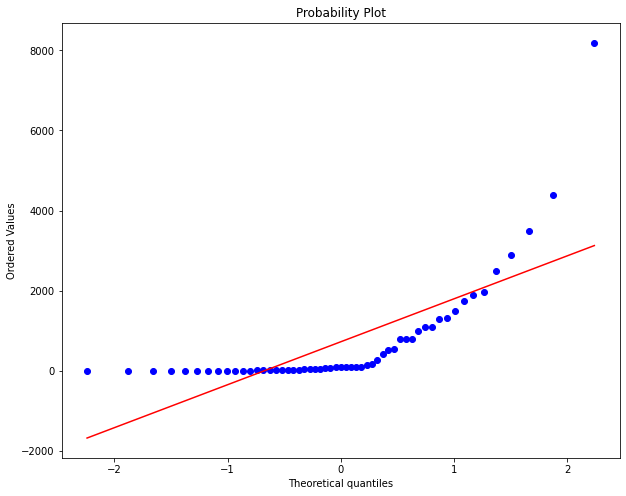

In [4]:
plt.figure(figsize=(10,8))
qq_norm = probplot(x = prices, dist = 'norm', fit = True, plot = plt)

### 3. Construction du QQ-plot pour une loi exponentielle

#### (a)

Soit $p\in]0,1[$, on note $F_\lambda$ la fonction de répartition d'une loi exponentielle de paramètre $\lambda$

D'une part, on a toujours par définition du quantile :
            $$F_\lambda (F^{-1}(p,\lambda))=p$$

D'autre part on a :
\begin{align*}
F_\lambda \left(\frac{1}{\lambda}F^{-1}(p;1)\right) & = 1-e^{-\lambda \left(\frac{1}{\lambda} F^{-1}(p;1)\right)} \\
& = 1-e^{-F^{-1}(p;1)} \\
& = F_1(F^{-1}(p;1)) \\
& = p
\end{align*} \\

La fonction de répartition d'une loi exponentielle étant bijective, donc injective, on a donc :
$$\forall p \in ]0,1[\,, \hspace{10pt} F^{-1}(p;\lambda)=\frac{1}{\lambda}F^{-1}(p;1) $$

#### (b) Tracé du QQ-plot

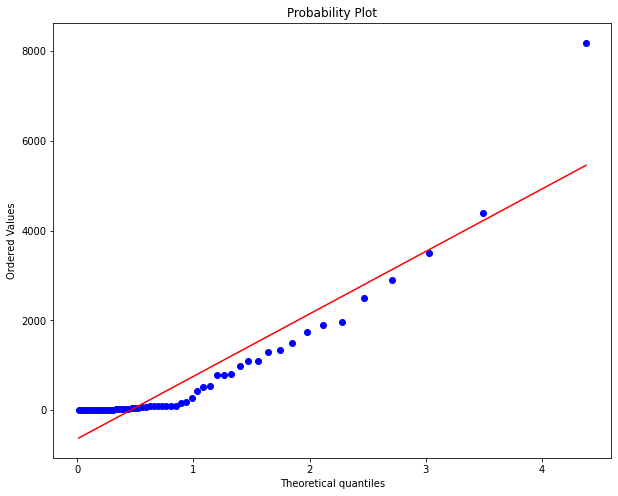

In [5]:
plt.figure(figsize=(10,8))
plt.title('Diagramme QQ pour la loi exponentielle')
qq_exp=probplot(x=prices, dist='expon',fit=True, plot=plt)
plt.show()

### 4. Loi la plus plausible

Le modèle statistique suit une certaine distribution théorique s'il y a une relation linéaire (ou affine) entre les quantiles et théoriques et ceux issus de la série statistique. On constate que le graphe obtenu à la question 2.b ne correspond pas à une telle relation.<br>En revanche, le diagramme de la question 3.b semble d'approcher d'avantage d'une droite.

On en déduit que parmi ces deux modèles, le plus plausible est celui d'une loi exponentielle.
<br>
<br>

## Exercice 2

### 1. Estimateur du maximum de vraisemblance

Soit $p_\lambda (x)=\lambda e^{-\lambda x}$ la densité d'une v.a. suivant une loi exponentielle

Comme les n observations sont supposées indépendantes, la densité du vecteur $X=(X_1,\dots,X_n)$ vaut alors :<br>

$$
p_\lambda (x) = \prod_{i=1}^n p_\lambda (x_i) = \lambda^n e^{-\lambda \sum_{i=1}^n x_i}
$$

En passant au log on a :

\begin{align*}
log\;p_\lambda (x)  & = log(\lambda^n e^{-\lambda \sum_{i=1}^n x_i}) \\
                    & = n\;log(\lambda)-\lambda \sum_{i=1}^n x_i
\end{align*}

On cherche le paramètre $\lambda$ qui maximise cette quantité. On la dérive par rapport à $\lambda$ :


$$\frac{d\; log\;p_\lambda (x)}{d\;\lambda} = \frac{n}{\lambda}-\sum_{i=1}^n x_i $$

Ainsi : 

\begin{align*}
\frac{d\; log\;p_\lambda (x)}{d\;\lambda} = 0 & \Leftrightarrow \frac{n}{\lambda}-\sum_{i=1}^n x_i = 0  \hspace{35pt} (On\;suppose\;que\;c'est\;un\;maximum)\\
& \Leftrightarrow \frac{n}{\lambda} = \sum_{i=1}^n x_i \\
& \Leftrightarrow \lambda=\frac{n}{\sum_{i=1}^n x_i}

\end{align*}

Donc :
$$\widehat{\lambda_n}=\frac{n}{\sum_{i=1}^n x_i}$$

### 2. Comparaison entre l'histogramme et la densité empirique

On multiplie la densité estimée par la somme des prix. En effet, l'aire de l'histogramme vaut la somme des prix alors que celle de la densité vaut 1.


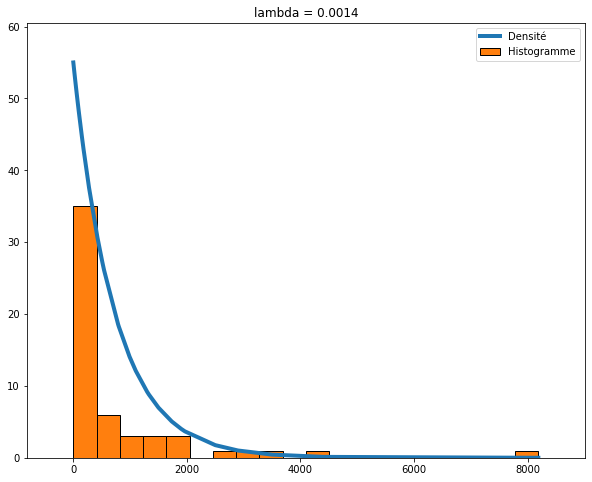

In [6]:
max_price = max(prices)
min_price = min(prices)

def gen_exp(lamb, x):
    return lamb*np.exp(- lamb * x)


lamb=len(prices)/sum(prices)

plt.figure(figsize=(10,8))
plt.title(f'lambda = {np.round(lamb, 4)}')
plt.plot(prices, lamb*np.exp(-lamb*prices)*sum(prices), linewidth=4, label='Densité')
plt.margins(0.1)
plt.hist(prices, bins=20, label='Histogramme', edgecolor='black')
plt.legend()
plt.show()

### 3. $T_1(X)$ estimateur efficace

On montre que $T_1$ est sans biais. On a :

\begin{align*}
E_\lambda(T_1(X))    & = E_\lambda\left(\frac{1}{n}\sum_{i=1}^n X_i\right) \\
                & = \frac{1}{n}\sum_{i=1}^n E_\lambda(X_i) \hspace{35pt} (Linéarité\;de\;l'espérance) \\
                & = \frac{n}{n}E(X_1) \hspace{35pt} (Les\;X_i\;sont\;i.i.d) \\
                & = \frac{1}{\lambda} \\
                & = g_1(\lambda)

\end{align*}

Ainsi, $b(\lambda, T_1)=E_\lambda(T_1(X)-g_1(\lambda))=0$<br>
Donc $T_1$ est sans biais

On montre que $Var(T_1(X))$ atteint la borne de Cramer-Rao $\frac{g'(\lambda)^2}{I(\lambda)}$

\begin{align*}
I_1(\lambda) &= E_\lambda\left[\left(\frac{\partial log\;p}{\partial \lambda}(X;\lambda)\right)^2\right] \hspace{35pt} (avec\;\;log\;p=log(\lambda)-\lambda x) \\
&= \int_0^{+\infty} \left(\frac{1}{\lambda}-x\right)^2\lambda e^{-\lambda x}dx \\
&= -\left[\left[\left(\frac{1}{\lambda}-x\right)^2 e^{-\lambda x}\right]_0^{+\infty} - \int_0^{+\infty}-2\left(\frac{1}{\lambda}-x\right)e^{-\lambda x} dx\right] \hspace{35pt} (En\;intégrant\;par\;parties)
\end{align*}

En intégrant de nouveau par parties on montre que l'intégrale de droite est nulle. Il ne reste donc que le terme de gauche, d'où : 
$$I_1(\lambda)=\frac{1}{\lambda^2}$$

On en déduit $I(\lambda)=nI_1(\lambda)=\frac{n}{\lambda^2}$ car les $X_i$ sont i.i.d <br>
De plus, $g'(\lambda)=-\frac{1}{\lambda^2}$<br>
Donc la borne de Cramer-Rao vaut : $\frac{1/\lambda^4}{n/\lambda^2}=\frac{1}{n\lambda^2}$

Enfin, $Var(T_1(X))=var(\frac{1}{n}\sum_{i=1}^n X_i)=\frac{1}{n^2}\sum_{i=0}^n Var(X_i)=\frac{1}{n^2}\frac{n}{\lambda^2}=\frac{1}{n\lambda^2}$

On a donc bien $Var(T_1(X))=\frac{g'(\lambda)^2}{I(\lambda)}$

La borne de Cramer-Rao est atteinte.<br>Donc $T_1$ est un estimateur efficace.

### 4. Calcul de $g_1$ en utilisant $T_1$

In [7]:
g1=np.cumsum(prices)[-1]/len(prices)
print(f'1/lambda = {np.round(g1,1)}')

1/lambda = 726.3


### 5. $\forall \lambda > 0, R(\lambda, \tilde{T}_{1,\eta}) < R(\lambda,T_1)$

Soit $\lambda>0$<br>
On exprime $R(\lambda, \tilde{T}_{1,\eta}) = (b(\lambda,\tilde{T}_{1,\eta}))^2+Var_\lambda(\tilde{T}_{1,\eta}(X))$ : 

Avec : 

\begin{align*}
b(\lambda,\tilde{T}_{1,\eta})  & = E_\lambda[\tilde{T}_{1,\eta}(X)-g_1(\lambda)] \\
                                & = E_\lambda\left[\eta T_1(X)-\frac{1}{\lambda}\right] \\
                                & = \frac{\eta}{\lambda}-\frac{1}{\lambda} \\
                                & = \frac{\eta-1}{\lambda}
\end{align*}

Et : 

\begin{align*}
Var_\lambda(\tilde{T}_{1,\eta}(X))  & = \eta^2 Var(T_1(X)) \\
                                    & = \eta^2 \frac{1}{n\lambda^2} \\
                                    & = \frac{\eta^2}{n\lambda^2}
\end{align*}

Donc : 

\begin{align*}
R(\lambda, \tilde{T}_{1,\eta})  & = \left(\frac{\eta-1}{\lambda}\right)^2+\frac{\eta^2}{n\lambda^2} \\
                                    & = \frac{(\eta -1)^2+\frac{\eta^2}{n}}{\lambda^2} \\
\end{align*}

On fait de même pour $R(\lambda,T_1)$, sachant que $b(\lambda,T_1)=0$ d'après la question 3

On a donc :

$$R(\lambda,T_1)=Var(T_1(X))=\frac{1}{n\lambda^2}$$

On cherche maintenant les valeurs de $\eta$ telles que $R(\lambda, \tilde{T}_{1,\eta}) < R(\lambda,T_1) : $

\begin{align*}
R(\lambda, \tilde{T}_{1,\eta}) < R(\lambda,T_1) & \Leftrightarrow \frac{(\eta -1)^2+\frac{\eta^2}{n}}{\lambda^2} < \frac{1}{n\lambda^2} \\
& \Leftrightarrow \frac{(\eta -1)^2+\frac{\eta^2}{n}}{\lambda^2} - \frac{1}{n\lambda^2} < 0 \\
& \Leftrightarrow (\eta -1)^2+\frac{\eta^2}{n} - \frac{1}{n} < 0 \\
& \Leftrightarrow \left(1+\frac{1}{n}\right)\eta^2-2\eta+1-\frac{1}{n} < 0 \\
\end{align*}

La dernière ligne est un trinômme en $\eta$ dont les racines sont $\eta_1=\frac{1-\frac{1}{n}}{1+\frac{1}{n}}$ et $\eta_2=1$ avec $\eta_1<\eta_2$.<br> Ainsi:
$$\left(1+\frac{1}{n}\right)\eta^2-2\eta+1-\frac{1}{n} < 0 \Leftrightarrow \frac{1-\frac{1}{n}}{1+\frac{1}{n}} < \eta  < 1 $$

Non contradiction...

### 6.

On note $m$ la médiane théorique et $F_X$ pour X suivant une loi exponentielle. On a :

\begin{align*}
F_X(m)=\frac{1}{2}  & \Leftrightarrow 1-e^{-\lambda\;m}=\frac{1}{2} \\
                    & \Leftrightarrow e^{-\lambda\;m}=\frac{1}{2} \\
                    & \Leftrightarrow \lambda\;m=log(2) \\
                    & \Leftrightarrow m=\frac{log(2)}{\lambda}
\end{align*}

De plus, on veut que l'estimateur soit sans biais :

\begin{align*}
b(\lambda,T_{1,\eta}(X))    &= E_\lambda(\tilde{T}_{1,\eta}(X)-m) \\
                            &= \frac{\eta}{\lambda}-\frac{log(2)}{\lambda} \hspace{35pt} (D'après\;(5)) \\
                            &= 0 \hspace{35pt} (Car\;l'estimateur\;est\;sans\;biais)
\end{align*}

Donc, $\eta = log(2)$

#### Comparaison avec la médiane empirique

In [8]:
# Médiane estimée
estimated= np.log(2)/len(prices)*sum(prices)
# Mediane empirique
empirical=statistics.median(prices)

print(f'Médiane estimée : {np.round(estimated, 1)}, Médiane empirique : {empirical}')

Médiane estimée : 503.5, Médiane empirique : 89.9




### 7. Comparaison des risques quadratiques de $T_1$ et $\tilde{T}_{1,\eta}$

On utilise les expressions de $R(\lambda, \tilde{T}_{1,\eta})$ et $R(\lambda, T_1)$ déterminées à la question (5)

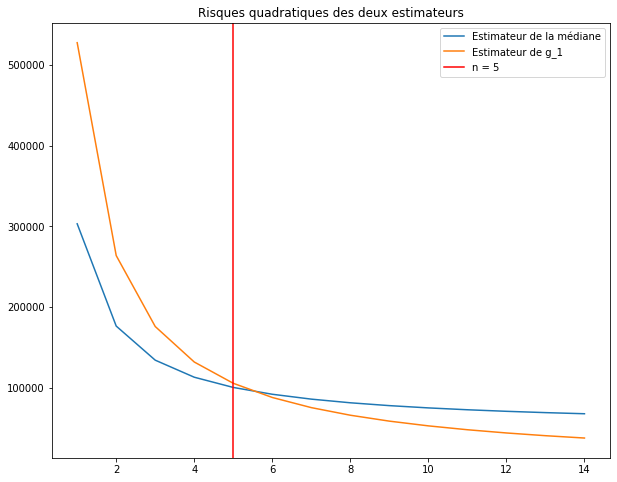

In [9]:
eta = np.log(2)

n = np.arange(1, 15, 1)

# Estimateur de la médiane
R_eta = ((eta-1)**2+((eta**2)/n))/lamb**2 # On utlise la valeur de lambda estimée précédemment
# Estimateur de la moyenne
R = 1/(n*lamb**2)

plt.figure(figsize=(10,8))
plt.title(f'Risques quadratiques des deux estimateurs')
plt.plot(n, R_eta, label='Estimateur de la médiane')
plt.plot(n, R, label='Estimateur de g_1')
plt.axvline(5, color='r', label='n = 5')
plt.legend()
plt.show()

On constate que pour $n>5$, l'inégalité démontrée à la question 5 n'est plus vérifiée.<br>
En effet : $\frac{1-\frac{1}{5}}{1+\frac{1}{5}} \simeq 0.67$ alors que $\eta=log(2)\simeq 0.69$.<br> $\eta$ n'est donc plus dans l'intervalle de validité de l'inégalité.

## Exercice 3

### 1. Formulation des hypothèses

Si $X \sim \mathcal{E}(\lambda)$ alors $\mathbb{E}(X)=\frac{1}{\lambda}$<br>
On veut que le coût d'un accident soit inférieur à $10^9\$$, soit $\mathbb{E}(X)<10^9$<br>
On pose donc $\lambda_p=10^{-9}$ et on a :

$\mathcal{H_0}: X\sim \mathcal{E}(\lambda_0)$ avec $\lambda_0 < \lambda_p$ (Le coût est supérieur à 1 milliard de dollars)<br>
$\mathcal{H_1}: X\sim \mathcal{E}(\lambda_1)$ avec $\lambda_1 > \lambda_p$ (Le coût est inférieur à 1 milliard de dollars)

### 2. Principe de Neyman-Pearson

\begin{align*}
Z(y)    &= \frac{p_{\lambda_1}(y)}{p_{\lambda_0}(y)} \\
        &= \frac{\lambda_1^n e^{-\lambda_1\sum_{i=1}^n X_i} } {\lambda_0^n e^{-\lambda_0\sum_{i=1}^n X_i}} \\
        &= \left(\frac{\lambda_1}{\lambda_0}\right)^n e^{-(\lambda_1-\lambda_0)\sum_{i=1}^n X_i} \\
        &= f(T(X))
\end{align*}

Avec $T(X)=\sum_{i=1}^n X_i=S_n$ et $f$ une fonction décroissante en $T(X)$

Or, on cherche $Z>t_\alpha$, avec $t_\alpha$ un seuil fixé, ce qui revient à chercher $S_n<t_\alpha'$ puisque $f$ est décroissante.

On détermine donc la loi de $T(X)$. On exprime sa fonction caractéristique :

\begin{align*}
\phi_{\sum_{i=1}^n X_i}(t)    &= \prod_{i=1}^n \phi_{X_i} (t) \\
        &= \left(\int_0^{+\infty} e^{-\lambda x} e^{itx} dx \right)^n \\
        &= \left(\frac{\lambda}{\lambda-it}\right)^n \\
        &= \frac{1}{(1-\frac{it}{\lambda})^n}
\end{align*}

On reconnait la fonction caractéristique d'une loi $\Gamma(n, \frac{1}{\lambda})$

On pose donc :
$$\delta: x \mapsto 1[T(X)<t_\alpha']$$

Avec $T(X) \sim \Gamma(n, \frac{1}{\lambda})$

On a alors :
$\mathbb{P}_{H_0}(T(X) \leq t_\alpha')=\alpha \Leftrightarrow t_\alpha=F_\Gamma^{-1}(\alpha;n,\frac{1}{\lambda})$

Avec $F_\Gamma^{-1}(p;n,\frac{1}{\lambda})$ la fonction quantile d'une loi $\Gamma(n,\frac{1}{\lambda})$

### 3. Application

On pose $\alpha=0.05$ 

Quantile d'ordre alpha : 31520.0 
S_n : 39948.5


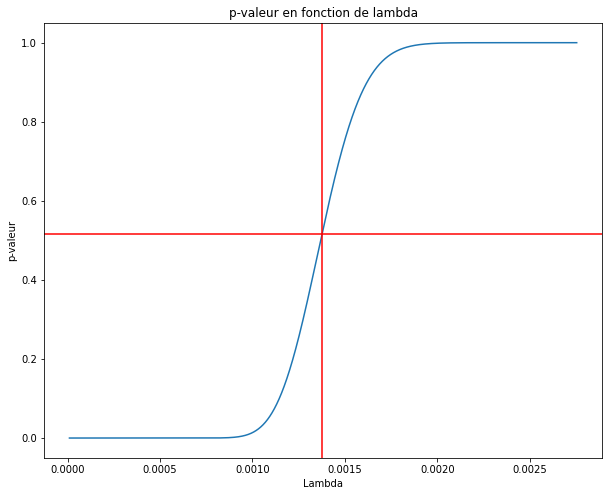

In [10]:
alpha = 0.05
n = len(prices)
abs= np.linspace(0.00001,2*lamb,1000000)

quantile = gamma.ppf(q=alpha, a=n, scale=1/lamb)
print(f'Quantile d\'ordre alpha : {np.round(quantile, 1)} \nS_n : {np.sum(prices)}')

# Determination de la p-valeur
pvalue=gamma.cdf(x=np.sum(prices), a=n, scale=1/abs)
plt.figure(figsize=(10,8))
plt.title('p-valeur en fonction de lambda')
plt.plot(abs,pvalue)
plt.xlabel('Lambda')
plt.ylabel('p-valeur')
plt.axvline(lamb, color='r')
plt.axhline(0.515, color='r')
plt.show()

On a $t_\alpha'<S_n$. On rejette donc l'hypothèse $\mathcal{H}_0$

On **peut donc** affirmer que le coût d'un accident est inférieur à 1 milliard de dollards.

### 4. Densité de $T_1$

On pose $\alpha=0.05,\;n=55,\;\lambda=10^{-9}$

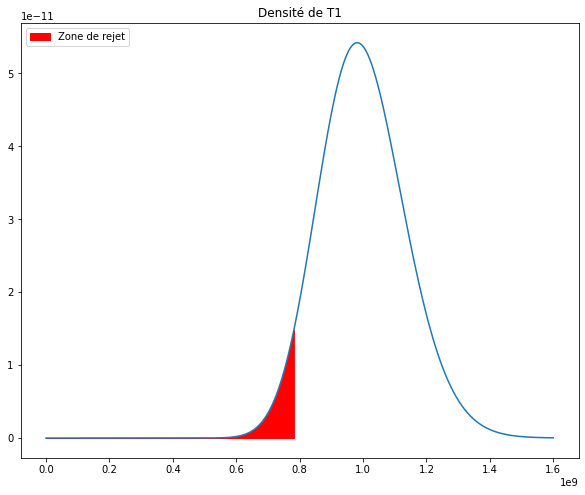

In [11]:
lamb_ref = 1e-9
quantile = gamma.ppf(alpha, n, 1/lamb_ref)

no_points=100000 # number of points

x=np.linspace(0, 1.6/lamb_ref, no_points)
y=gamma.pdf(x*n, a=n, scale=1/lamb_ref)

acc=0
index=0
for i in range(len(x)):
    if acc < alpha*10**-11:
        acc+=y[i]/no_points
        index=i
    else:
        index=i
        break

x_reject = x[:index]
y_reject = y[:index]

plt.figure(figsize=(10,8))
plt.plot(x, y)
plt.fill_between(x_reject, np.zeros(index), y_reject, color='r', label='Zone de rejet')
plt.title('Densité de T1')
plt.legend(loc='upper left')
plt.show()

### 5. Fonction puissance de test

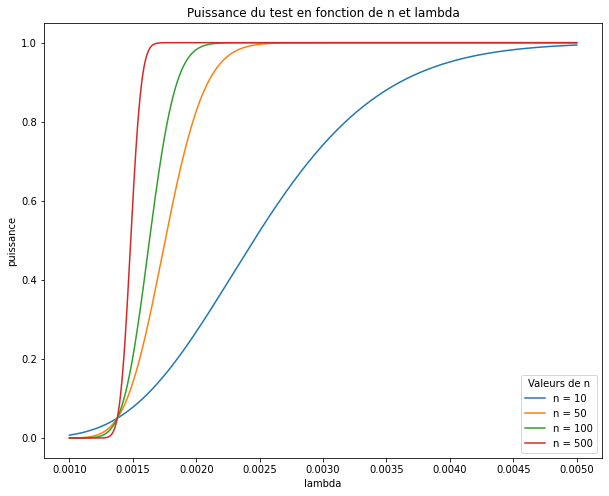

In [13]:
a=[10, 50, 100, 500, 100000] # Differentes valeur de n
c=gamma.ppf(q=alpha, a=a,scale=1/lamb) # Calcul du quantile 
abs=np.linspace(1e-3,1e-2/2,1000)


plt.figure(figsize=(10,8))
plt.title('Puissance du test en fonction de n et lambda')


for k in range(4) : 
    power_test = gamma.cdf(x=c[k] , a=a[k], scale = 1/abs)
    plt.plot(abs,power_test,label='n = {}'.format(a[k]))

plt.xlabel('lambda')
plt.ylabel('puissance')
plt.legend(loc='lower right',title='Valeurs de n')
plt.show()

D'une part on remarque que plus $\lambda$ augmente, plus le test est puissant.<br>
D'autre part, plus l'échantillon est grand, plus le test converge vite vers 1.

### 6. Approximation de $T_1$

On pose $S_n=\sum_{i=1}^nX_i,\;E(X_i)=\mu,\;Var(X_i)=\sigma^2$

On reprend les mêmes hypothèses que précédement : 

$\mathcal{H}_0: \mu > \frac{1}{\lambda_p}$<br>
$\mathcal{H}_1: \mu < \frac{1}{\lambda_p}$

D'après le théorème centrale limite, pour $n$ grand,
$$T=\frac{S_n-\mu}{\sigma\sqrt{n}}\sim\mathcal{N}(0,1)$$

Or,
$$\frac{S_n-\mu}{\sigma\sqrt{n}}=\sqrt{n}\frac{T_1-\mu}{\sigma}$$

Pour une loi $\mathcal{N}(0,1)$, on trouve $F^{-1}(0.05;0,1)\simeq-1.645$ pour le quantile d'ordre $\alpha=0.05$ (cf code ci-dessous).

La zone de rejet est définie comme étant : 
$$\mathfrak{R}=\{T\in \mathbb{R}\;\;|\;\; T<F^{-1}(0.05;0,1)\}$$

In [ ]:
t1=np.mean(prices)*1e6 # Prix moyen en $
norm_q=norm.ppf(0.05, loc=0, scale=1) # Quantile d'ordre 0.05

t=math.sqrt(n)*((t1-1e9)/(1e9))
print(f'Valeur de T : {np.round(t,3)}')

Valeur de T : -2.03


On obtient $T\in\mathfrak{R}$

T est donc dans la zone de rejet. 

Donc on rejette l'hypothèse $\mathcal{H_0}$.